In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Étape 2 : Charger les données


In [2]:
# Charger le dataset Iris
data = load_iris()
X = data.data  # Features (4 variables : longueur/largeur des pétales/sépales)
y = data.target  # Target (3 espèces d'iris)
feature_names = data.feature_names

# Créer un DataFrame pour visualisation
df = pd.DataFrame(X, columns=feature_names)
print("Aperçu des données :")
print(df.head())

Aperçu des données :
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                5.1               3.5                1.4               0.2
1                4.9               3.0                1.4               0.2
2                4.7               3.2                1.3               0.2
3                4.6               3.1                1.5               0.2
4                5.0               3.6                1.4               0.2


In [3]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


# Étape 3 : Standardiser les données

L’ACP est sensible à l’échelle des variables → on standardise (moyenne=0, écart-type=1).

In [4]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Étape 4 : Appliquer l’ACP

In [5]:
# Initialiser l’ACP avec 2 composantes (pour visualisation)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Créer un DataFrame des composantes
df_pca = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df_pca['Species'] = y  # Ajouter les espèces pour le coloriage

# Étape 5 : Visualiser les composantes

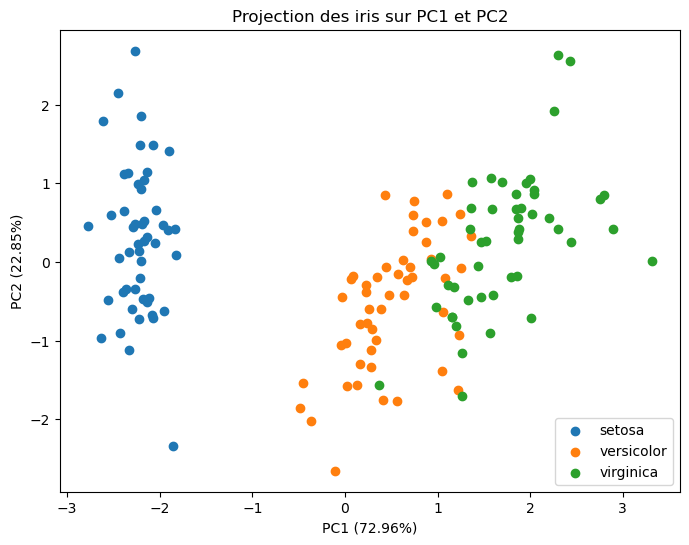

In [6]:
plt.figure(figsize=(8, 6))
for species in [0, 1, 2]:
    plt.scatter(
        df_pca[df_pca['Species'] == species]['PC1'],
        df_pca[df_pca['Species'] == species]['PC2'],
        label=data.target_names[species]
    )
plt.xlabel('PC1 ({}%)'.format(round(pca.explained_variance_ratio_[0]*100, 2)))
plt.ylabel('PC2 ({}%)'.format(round(pca.explained_variance_ratio_[1]*100, 2)))
plt.title('Projection des iris sur PC1 et PC2')
plt.legend()
plt.show()

# Étape 6 : Interpréter les composantes

In [7]:
# Variance expliquée par chaque composante
print("Variance expliquée par chaque composante :", pca.explained_variance_ratio_)

# Contribution des variables originales aux composantes
loadings = pd.DataFrame(
    pca.components_.T,
    columns=['PC1', 'PC2'],
    index=feature_names
)
print("\nContribution des variables aux composantes :")
print(loadings)

Variance expliquée par chaque composante : [0.72962445 0.22850762]

Contribution des variables aux composantes :
                        PC1       PC2
sepal length (cm)  0.521066  0.377418
sepal width (cm)  -0.269347  0.923296
petal length (cm)  0.580413  0.024492
petal width (cm)   0.564857  0.066942


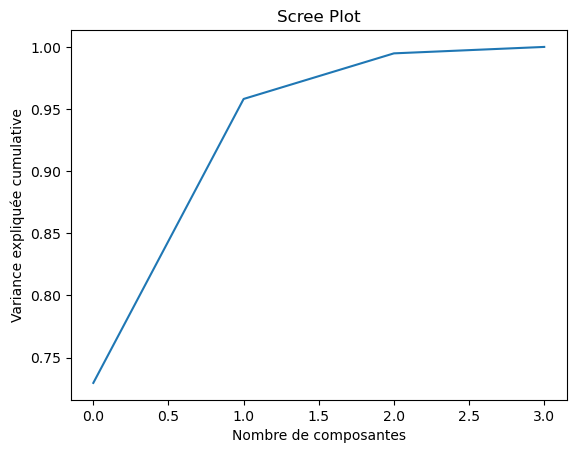

In [8]:
# Calculer l'ACP avec toutes les composantes
pca_full = PCA().fit(X_scaled)

# Tracer la variance expliquée cumulative
plt.plot(np.cumsum(pca_full.explained_variance_ratio_))
plt.xlabel('Nombre de composantes')
plt.ylabel('Variance expliquée cumulative')
plt.title('Scree Plot')
plt.show()

# 1. Variance expliquée par chaque composante

PC1 explique 72.96% de la variance totale des données.

PC2 explique 22.85% de la variance totale des données.

Ensemble, PC1 et PC2 expliquent 95.81% de la variance totale. Cela signifie qu’en utilisant seulement ces deux composantes, on capture presque toute l’information des données originales (4 variables).

# 2. Contribution des variables aux composante
Interprétation de PC1

sepal length (cm) : 0.521

sepal width (cm) : -0.269

petal length (cm) : 0.580

petal width (cm) : 0.565

Analyse :

Les variables petal length, petal width, et sepal length ont des valeurs positives élevées sur PC1. Cela signifie qu’elles contribuent fortement à cette composante.

sepal width a une valeur négative, mais sa contribution est plus faible.

Conclusion : PC1 représente principalement la taille de la fleur, en particulier la longueur et la largeur des pétales.

Interprétation de PC2

sepal length (cm) : 0.377

sepal width (cm) : 0.923

petal length (cm) : 0.024

petal width (cm) : 0.066

Analyse :

sepal width a une valeur très élevée (0.923) sur PC2, ce qui signifie qu’elle domine cette composante.

Les autres variables ont des contributions très faibles.

Conclusion : PC2 représente principalement la largeur du sépale.

# 3. Visualisation des résultats
Avec ces interprétations, on peut comprendre pourquoi les espèces d’iris sont bien séparées sur le graphique PC1 vs PC2 :

PC1 (taille de la fleur) sépare les espèces en fonction de la longueur des pétales et des sépales.

PC2 (largeur du sépale) ajoute une dimension supplémentaire pour affiner la séparation.

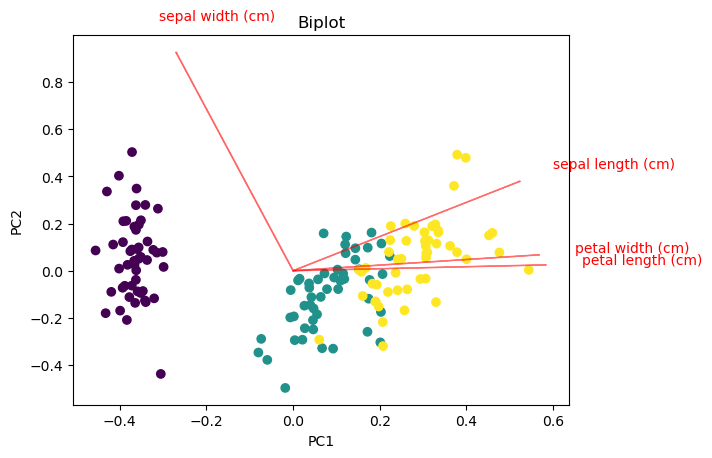

In [9]:
def biplot(score, loadings, labels=None):
    xs = score[:, 0]  # PC1
    ys = score[:, 1]  # PC2
    scalex = 1.0 / (xs.max() - xs.min())
    scaley = 1.0 / (ys.max() - ys.min())
    plt.scatter(xs * scalex, ys * scaley, c=y)

    for i, feature in enumerate(loadings):
        plt.arrow(0, 0, feature[0], feature[1], color='r', alpha=0.5)
        plt.text(feature[0] * 1.15, feature[1] * 1.15, feature_names[i], color='r')

    plt.xlabel('PC1')
    plt.ylabel('PC2')
    plt.title('Biplot')
    plt.show()

# Appeler la fonction biplot
biplot(X_pca, pca.components_.T)

C1 (axe horizontal) :

Les flèches petal length, petal width, et sepal length pointent vers la droite → elles dominent PC1.

Les iris virginica et versicolor (à droite) ont les pétales les plus longs/larges.

PC2 (axe vertical) :

La flèche sepal width pointe vers le haut → c’est la variable clé pour PC2.

Les iris setosa (en haut) ont des sépales plus larges.

Corrélations :

petal length et petal width sont presque parallèles → fortement corrélées positivement.

sepal width est presque orthogonale à petal length → faible corrélation.